In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import os
path = 'Iris.csv' # 文件路径
pdData = pd.read_csv(path,header = None, names = ['sepal_len','sepal_width','petal_len','petal_width','variety']) # 读取数据
pdData.head() # 显示数据

,sepal_len,sepal_width,petal_len,petal_width,variety
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [30]:
pdData.shape 

(100, 5)

In [31]:
pdData.loc[pdData['variety'] == 'Iris-versicolor', 'variety'] = 0 # 将数据集的种类分别设为0和1
pdData.loc[pdData['variety'] == 'Iris-virginica', 'variety'] = 1

Text(0,0.5,'petal_width')

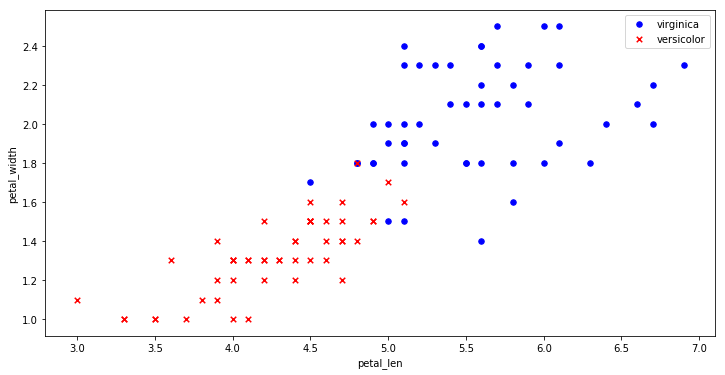

In [32]:
positive = pdData[pdData['variety'] == 1]
negative = pdData[pdData['variety'] == 0]

fig, ax = plt.subplots(figsize=(12, 6)) # 指定散点图的长和高 
ax.scatter(positive['petal_len'], positive['petal_width'], s=30, c='b', marker='o', label='virginica')  # 散点图的属性和标签
ax.scatter(negative['petal_len'], negative['petal_width'], s=30, c='r', marker='x', label='versicolor')
ax.legend() 
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_width')

In [33]:
# sigmoid函数：映射到概率的函数

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [34]:
 def model(X,theta):
    return sigmoid (np.dot(X,theta.T))

In [35]:
pdData.insert(2,'Ones',1) # 在第三列的地方插入一列全为1的矩阵

orig_data = pdData.as_matrix() 
cols = orig_data.shape[1]
X = orig_data[:,2:cols-1] # 选取 3~5列作为X
y = orig_data[:,cols-1:cols] # 选取最后一列作为y

theta = np.zeros([1,3]) # 构造一个参数矩阵

C:\Users\wax\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
X[:5]

array([[1. , 4.7, 1.4],
       [1. , 4.5, 1.5],
       [1. , 4.9, 1.5],
       [1. , 4. , 1.3],
       [1. , 4.6, 1.5]])

In [37]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
theta

array([[0., 0., 0.]])

In [39]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

In [40]:
np.random.shuffle(orig_data)  # 100个数据全部打乱

In [41]:
test_data = np.vstack(orig_data[:10,:])  #测试集

In [42]:
train_data = np.vstack(orig_data[10:100,:])  #训练集

In [43]:
X = train_data[:, 2:cols - 1]  # 选择前三列
y = train_data[:, cols - 1:cols]

In [44]:
X[:5]

array([[1. , 4.1, 1. ],
       [1. , 3.8, 1.1],
       [1. , 5.4, 2.1],
       [1. , 6.9, 2.3],
       [1. , 4.4, 1.4]])

In [45]:
#损失函数
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta))) 
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))  
    return np.sum(left - right) / (len(X))

In [46]:
cost(X, y, theta)

0.6931471805599454

In [47]:
# 计算梯度
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)  
    error = (model(X, theta) - y).ravel() 
    for j in range(len(theta.ravel())): 
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)

    return grad

In [48]:
#停止函数
def stopCriterion(value, threshold):
    return value > threshold

In [49]:
#  打乱数据
import numpy.random

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols - 1]
    y = data[:, cols - 1:]
    return X, y

In [50]:
# 求解梯度下降
def descent(data, theta, batchSize, thresh, alpha):
    
    i = 0  # 设置迭代次数
    k = 0  # batch
    X, y = shuffleData(data)  # 打乱数据
    grad = np.zeros(theta.shape)  # 计算初始的梯度
    costs = [cost(X, y, theta)]  # 计算初始损失函数值

    # 开始迭代
    while True:
        grad = gradient(X[k:k + batchSize], y[k:k + batchSize], theta)  # 求解梯度值
        k += batchSize  # 取batch个数据
        if k >= n: 
            k = 0
            X, y = shuffleData(data)  
        theta = theta - alpha * grad  # 更新参数 
        costs.append(cost(X, y, theta))  
        i += 1  # 更新循环变量

        value = i
        if stopCriterion( value, thresh):  # 停止跳出循环
            break
    return theta, i - 1, costs, grad


In [51]:
# 绘制图像
def runExpe(data, theta, batchSize,  thresh, alpha):
    theta, iter, costs, grad = descent(data, theta, batchSize, thresh, alpha)  # 开始执行梯度下降
   
    fig, ax = plt.subplots(figsize=(12, 6)) 
    ax.plot(np.arange(len(costs)), costs, 'b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(' Loss function change Figure')
    plt.show()
    return theta

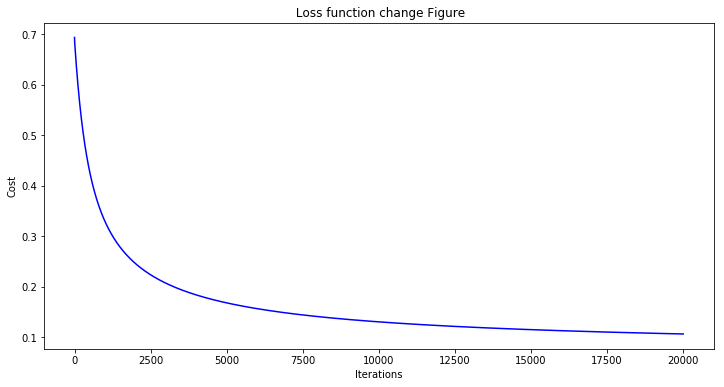

In [52]:
n = 100
train_data = train_data[:,2:cols] # 指定要输入的数据
theta = runExpe(train_data, theta, n, thresh=20000, alpha=0.1)

In [53]:
# 预测函数
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [54]:
scaled_X = test_data[:, 2:5]  # 设置测试集输入
y = test_data[:, 5]  # 正确值
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)] #真实的种类
accuracy = (sum(map(int, correct)) / len(correct)) * 100 # 正确率
print('accuracy = {0}%'.format(accuracy))

accuracy = 80.0%
